# Visualização de Dados e Análise Exploratória:


* 1) Introdução:

    - importar bibliotecas;
    - carregar os dados;
    
* 2) Visualizações e Insigths:

    - resumo do PandasProfile;
    - Visualização hands-on;
    
* 3) Dados Faltantes:

    - tratativas de dados faltantes;

In [1]:
# importação de bibliotecas:

import pandas as pd
import numpy as np


## Conteúdo dos dados:

Usarei o dataset do titanic disponível na plataforma do Kaggle em https://www.kaggle.com/c/titanic/data

* PassengerId: Identificador único para cada passageiro;
* Survived: Indica se o passageiro sobreviveu, onde: (0 - Não, 1 - Sim);
* Pclass: Classe do passageiro (1 - Primeira Classe, 2 - Segunda Classe, 3 - Terceira Classe);
* Name: Nome do passageiro;
* Sex: Sexo do passageiro;
* Age: Idade do passageiro;
* SibSp: Número de irmãos/esposas a bordo;
* Parch: Número de pais/filhos a bordo;
* Ticket: Número da passagem;
* Fare: Preço da passagem;
* Cabin: Cabine;
* Embarked: Local onde o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
#Leitura dos arquivos:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')


In [48]:
#concatenar os datasets de treino e teste:
#df = pd.merge(train, test, how = 'left', on = 'PassengerId')
df = pd.concat([train, test])


In [50]:
# Podemos visualizar as primeiras linhas do DataFrame (DF) com o método head()
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# Podemos visualizar as últimas linhas do DF com o método tail()

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [52]:
# O método sample() mostra linhas aleatórias do DF

df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
197,198,0.0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S


In [53]:
# trazer as informações do df: 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [54]:
# exibição do nome das colunas: 
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
#tamanho total do df (quantidade de linhas e colunas): 

df.shape

(1309, 12)

In [56]:
# quantidade de dados duplicados:
x = df.duplicated()
x.sum()


0

In [57]:
# estatísticas resumidas do df: 
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [58]:
# analisando dados faltantes:
df.isnull().sum().sort_values(ascending = False)




Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

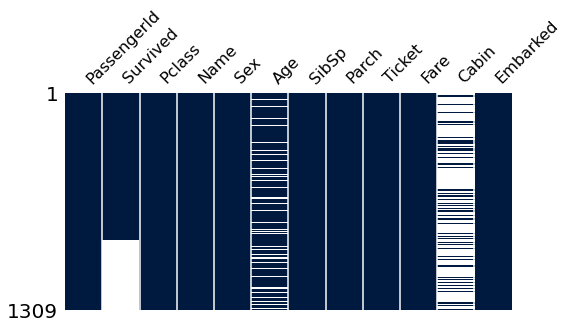

In [59]:
import missingno as msno
import matplotlib as plt

msno.matrix(df, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False)